# Import and clean data :

In [168]:
import pandas as pd

file_path = "./datasets/dataset.csv"

heart_disease = pd.read_csv(file_path)
print(heart_disease.info)

<bound method DataFrame.info of      Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0       BMW7812   67    Male          208         158/88          72   
1       CZE1114   21    Male          389         165/93          98   
2       BNI9906   21  Female          324         174/99          72   
3       JLN3497   84    Male          383        163/100          73   
4       GFO8847   66    Male          318          91/88          93   
...         ...  ...     ...          ...            ...         ...   
8758    MSV9918   60    Male          121          94/76          61   
8759    QSV6764   28  Female          120        157/102          73   
8760    XKA5925   47    Male          250         161/75         105   
8761    EPE6801   36    Male          178         119/67          60   
8762    ZWN9666   25  Female          356         138/67          75   

      Diabetes  Family History  Smoking  Obesity  ...  \
0            0               0        1       

In [169]:
print(heart_disease['Heart Attack Risk'].value_counts())

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


In [170]:
y = heart_disease["Heart Attack Risk"]
print(y)

dropped_columns = ["Country","Blood Pressure","Heart Attack Risk"]
X = heart_disease.drop(dropped_columns,axis=1)
print(X.head())



0       0
1       0
2       0
3       0
4       0
       ..
8758    0
8759    0
8760    1
8761    0
8762    1
Name: Heart Attack Risk, Length: 8763, dtype: int64
  Patient ID  Age     Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0    BMW7812   67    Male          208          72         0               0   
1    CZE1114   21    Male          389          98         1               1   
2    BNI9906   21  Female          324          72         1               0   
3    JLN3497   84    Male          383          73         1               1   
4    GFO8847   66    Male          318          93         1               1   

   Smoking  Obesity  Alcohol Consumption  ...  Medication Use Stress Level  \
0        1        0                    0  ...               0            9   
1        1        1                    1  ...               0            1   
2        0        0                    0  ...               1            9   
3        1        0                    1  ...

In [171]:
X.isnull().values.any()

False

In [172]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline(steps=[
    ("encoder", OrdinalEncoder())
])

X_trans = pipeline.fit_transform(X)
X_trans = pd.DataFrame(X_trans,columns=kept_columns)
print(X_trans)

      Patient ID   Age  Sex  Cholesterol  Heart Rate  Diabetes  \
0          521.0  49.0  1.0         88.0        32.0       0.0   
1          998.0   3.0  1.0        269.0        58.0       1.0   
2          529.0   3.0  0.0        204.0        32.0       1.0   
3         3160.0  66.0  1.0        263.0        33.0       1.0   
4         2083.0  48.0  1.0        198.0        53.0       1.0   
...          ...   ...  ...          ...         ...       ...   
8758      4228.0  42.0  1.0          1.0        21.0       1.0   
8759      5502.0  10.0  0.0          0.0        33.0       1.0   
8760      7837.0  29.0  1.0        130.0        65.0       0.0   
8761      1552.0  18.0  1.0         58.0        20.0       1.0   
8762      8719.0   7.0  0.0        236.0        35.0       1.0   

      Family History  Smoking  Obesity  Alcohol Consumption  ...  \
0                0.0      1.0      0.0                  0.0  ...   
1                1.0      1.0      1.0                  1.0  ...   
2  

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=0)

## KNeighborsClassifier :

Accuracy for 5 neighbors : 0.5596120935539076
Accuracy for 10 neighbors : 0.6018254420992584
Accuracy for 15 neighbors : 0.6058185966913862
Accuracy for 20 neighbors : 0.6223616657159156
Accuracy for 25 neighbors : 0.6160867084997148
Accuracy for 30 neighbors : 0.6269252709640616
Accuracy for 35 neighbors : 0.6240730176839704
Accuracy for 40 neighbors : 0.6320593268682259
Accuracy for 45 neighbors : 0.6309184255561894
Accuracy for 50 neighbors : 0.6309184255561894
Accuracy for 55 neighbors : 0.6360524814603536
Accuracy for 60 neighbors : 0.6371933827723902
Accuracy for 65 neighbors : 0.638904734740445
Accuracy for 70 neighbors : 0.6360524814603536
Accuracy for 75 neighbors : 0.6371933827723902
Accuracy for 80 neighbors : 0.6371933827723902
Accuracy for 85 neighbors : 0.6366229321163719
Accuracy for 90 neighbors : 0.6354820308043354
Accuracy for 95 neighbors : 0.6360524814603536
Accuracy for 100 neighbors : 0.6360524814603536
Accuracy for 105 neighbors : 0.6360524814603536
Accuracy for 

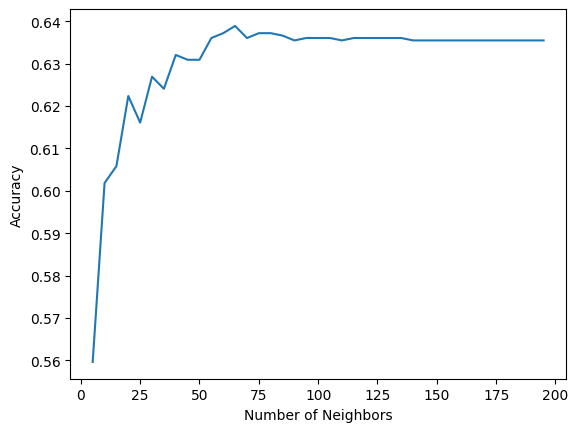

In [174]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

start = dt.now()
n_neighbors = list(range(5,200,5))
acc_list=[]
max_acc_knn = 0
best_neighbor_knn = 0

for i in n_neighbors:
    model_1 = KNeighborsClassifier(n_neighbors=i)
    model_1.fit(X_train,y_train)
    prediction_1 = model_1.predict(X_test)
    accuracy = accuracy_score(prediction_1, y_test)
    if accuracy > max_acc_knn :
        max_acc_knn = accuracy
        best_neighbor_knn = i
    acc_list.append(accuracy)
    print(f"Accuracy for {i} neighbors : {accuracy}")

print(f"\n The optimal number of neighbors is {best_neighbor_knn} with an accuracy of {max_acc_knn} \n")


running_secs = (dt.now() - start).seconds
print(f"Run time : {running_secs} seconds")

plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.plot(n_neighbors, acc_list)
plt.show()


In [175]:
model_1 = KNeighborsClassifier(n_neighbors=65)
model_1.fit(X_train,y_train)
prediction_1 = model_1.predict(X_test)
print(pd.Series(prediction_1).value_counts())

0    1743
1      10
Name: count, dtype: int64


In [176]:
from sklearn.metrics import confusion_matrix

model_2 = KNeighborsClassifier(n_neighbors=65)
model_2.fit(X_train,y_train)
prediction_2 = model_2.predict(X_trans)


cm = confusion_matrix(prediction_2, y)
print(cm)
print(accuracy_score(prediction_2, y))

[[5608 3110]
 [  16   29]]
0.6432728517630948


## Gradient Boost Classifier : 

Accuracy with 50 estimators : 0.6349115801483172
Accuracy with 70 estimators : 0.6326297775242442
Accuracy with 90 estimators : 0.6332002281802624
Accuracy with 110 estimators : 0.6314888762122076
Accuracy with 130 estimators : 0.6297775242441529
Accuracy with 150 estimators : 0.6292070735881347
Accuracy with 170 estimators : 0.6297775242441529
Accuracy with 190 estimators : 0.6309184255561894
Accuracy with 210 estimators : 0.6297775242441529
Accuracy with 230 estimators : 0.6292070735881347

 The optimal number of estimators is 50 with an accuracy of 0.6349115801483172 

Run time : 36 seconds


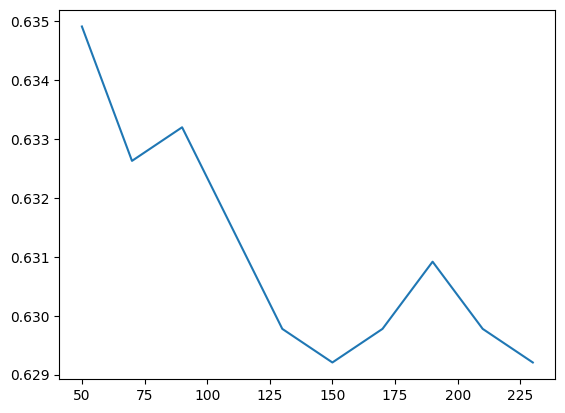

In [177]:
from sklearn.ensemble import GradientBoostingClassifier

start = dt.now()
acc_list=[]
est_list=[]
max_acc_gb=0
best_estimator_gb=0


for i in range(50,250,20):
    model_2 = GradientBoostingClassifier(random_state=0,n_estimators = i)
    model_2.fit(X_train,y_train)
    prediction_2 = model_2.predict(X_test)
    accuracy = accuracy_score(prediction_2, y_test)
    if accuracy > max_acc_gb :
        max_acc_gb = accuracy
        best_estimator_gb = i
    acc_list.append(accuracy)
    est_list.append(i)
    print(f"Accuracy with {i} estimators : {accuracy}")

print(f"\n The optimal number of estimators is {best_estimator_gb} with an accuracy of {max_acc_gb} \n")

running_secs = (dt.now() - start).seconds
print(f"Run time : {running_secs} seconds")

plt.plot(est_list,acc_list)
plt.show()

## Random Forest Classifier : 

Accuracy with 10 estimators : 0.5978322875071307
Accuracy with 30 estimators : 0.6263548203080433
Accuracy with 50 estimators : 0.6332002281802624
Accuracy with 70 estimators : 0.6320593268682259
Accuracy with 90 estimators : 0.6343411294922989
Accuracy with 110 estimators : 0.6366229321163719
Accuracy with 130 estimators : 0.6354820308043354
Accuracy with 150 estimators : 0.6360524814603536
Accuracy with 170 estimators : 0.6349115801483172
Accuracy with 190 estimators : 0.6354820308043354
Accuracy with 210 estimators : 0.6343411294922989
Accuracy with 230 estimators : 0.6349115801483172

 The optimal number of estimators is 110 with an accuracy of 0.6366229321163719 

Run time : 24 seconds


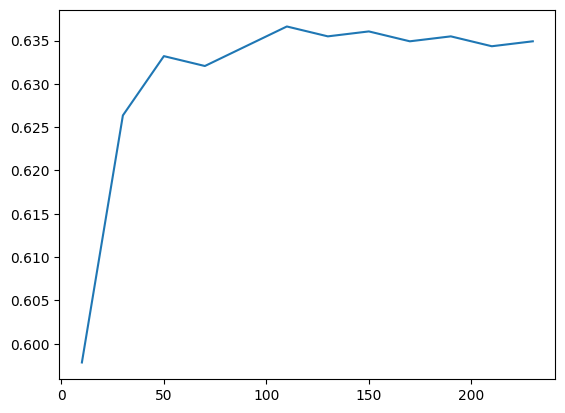

In [178]:
from sklearn.ensemble import RandomForestClassifier

start = dt.now()
acc_list=[]
est_list=[]
max_acc_rf=0
best_estimator_rf=0


for i in range(10,250,20):
    model_2 = RandomForestClassifier(random_state=0,n_estimators=i)
    model_2.fit(X_train,y_train)
    prediction_2 = model_2.predict(X_test)
    accuracy = accuracy_score(prediction_2, y_test)
    if accuracy > max_acc_rf :
        max_acc_rf = accuracy
        best_estimator_rf = i
    acc_list.append(accuracy)
    est_list.append(i)
    print(f"Accuracy with {i} estimators : {accuracy}")

print(f"\n The optimal number of estimators is {best_estimator_rf} with an accuracy of {max_acc_rf} \n")

running_secs = (dt.now() - start).seconds
print(f"Run time : {running_secs} seconds")

plt.plot(est_list,acc_list)
plt.show()

## Comparing the classification models : 

<BarContainer object of 3 artists>

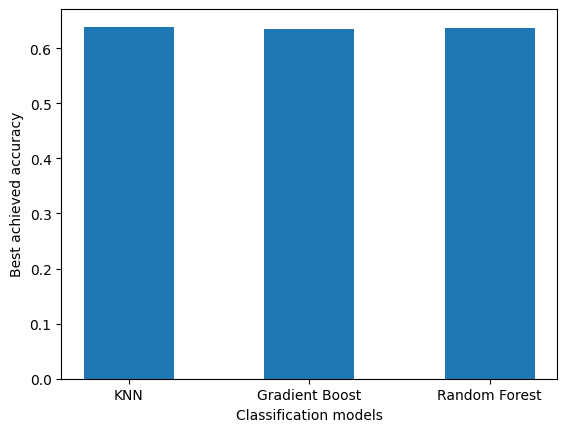

In [192]:
list_acc_models = [max_acc_knn,max_acc_gb,max_acc_rf]
list_models_name=["KNN","Gradient Boost","Random Forest"]

plt.xlabel("Classification models")
plt.ylabel("Best achieved accuracy")
plt.bar(height=list_acc_models, x=list_models_name, width=0.5)